# Uploading the Dataset

In [ ]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file on Google Drive
zip_path = '/content/drive/MyDrive/CIFAKE.zip'

# Destination directory where you want to extract the files
dest_dir = '/content/CIFAKE/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dest_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(dest_dir)
print("Extracted files:", extracted_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted files: ['__MACOSX', 'CIFAKE']


# Preprocessing the dataset

In [ ]:
import os
import random
import numpy as np
from PIL import Image

# Define directories for real and fake images
real_dir = '/content/CIFAKE/CIFAKE/train/REAL'
fake_dir = '/content/CIFAKE/CIFAKE/train/FAKE'

# Get the list of real and fake image files
real_images = [os.path.join(real_dir, filename) for filename in os.listdir(real_dir) if filename.endswith('.jpg') or filename.endswith('.png')]
fake_images = [os.path.join(fake_dir, filename) for filename in os.listdir(fake_dir) if filename.endswith('.jpg') or filename.endswith('.png')]

# Combine real and fake images along with their labels
combined_data = [(image_path, 1) for image_path in real_images] + [(image_path, 0) for image_path in fake_images]

# Shuffle the combined data
random.shuffle(combined_data)

# Define a function to load images
def load_image(image_path):
    image = Image.open(image_path)
    return np.array(image)

# Load images and labels into arrays
images = []
labels = []
for image_path, label in combined_data:
    image_array = load_image(image_path)
    images.append(image_array)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Save images and labels to a single numpy archive file
np.savez('/content/original_train_dataset.npz', images=images, labels=labels)

print("Combined dataset created and saved successfully as 'original_train_dataset.npz'.")



Combined dataset created and saved successfully as 'original_train_dataset.npz'.


Shape of images array: (100000, 32, 32, 3)
Shape of labels array: (100000,)


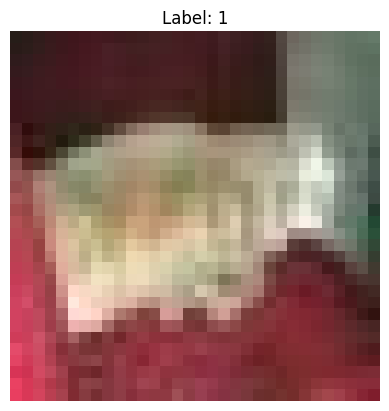

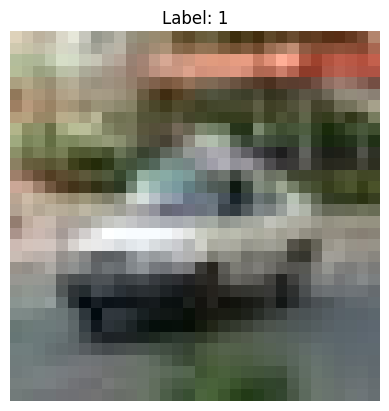

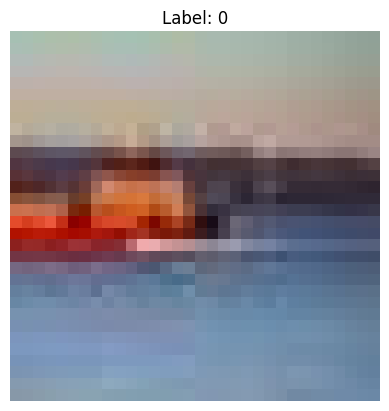

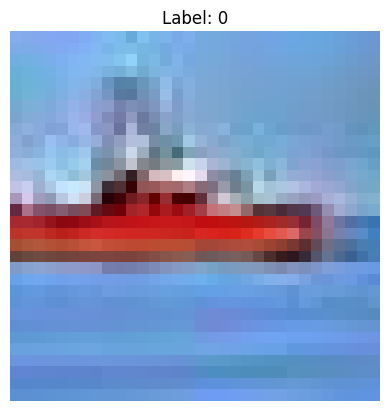

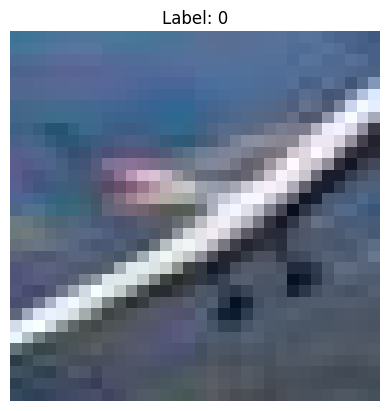

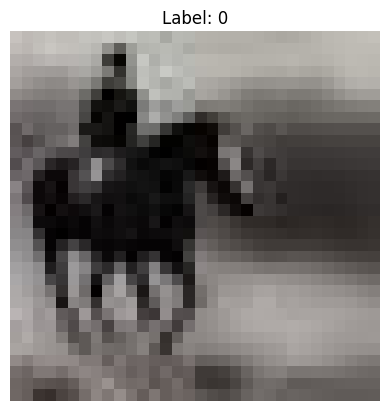

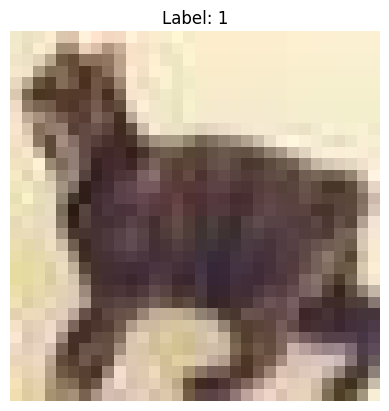

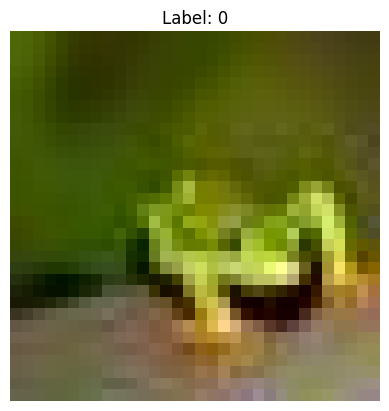

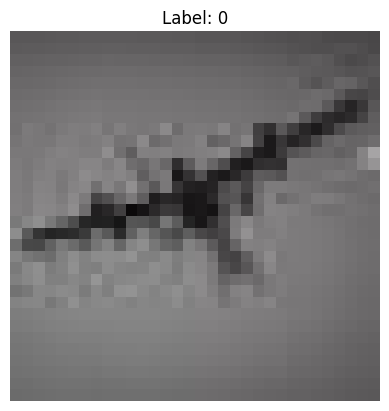

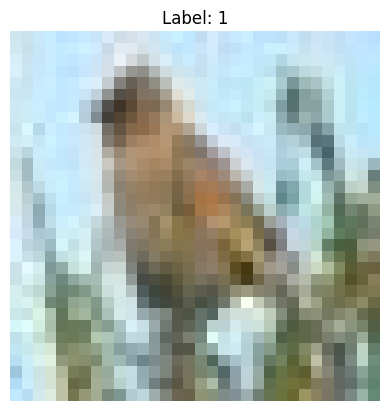

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the combined dataset
dataset = np.load('/content/original_train_dataset.npz')

# Extract images and labels from the dataset
images = dataset['images']
labels = dataset['labels']

# Print the shape of the dataset
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)

# Display the first few images along with their labels
num_images_to_display = 10
for i in range(num_images_to_display):
    image = images[i]
    label = labels[i]
    plt.imshow(image)
    plt.title('Label: ' + str(label))
    plt.axis('off')
    plt.show()


In [ ]:
# Get the total number of columns and their names
total_columns = dataset.files
column_names = [column_name for column_name in total_columns]

print("Total number of columns:", len(total_columns))
print("Column names:", column_names)

Total number of columns: 2
Column names: ['images', 'labels']


In [ ]:
# Get the number of unique values and list them
unique_values = np.unique(labels)
num_unique_values = len(unique_values)

print("Number of unique values in labels:", num_unique_values)
print("Unique values in labels:", unique_values)

Number of unique values in labels: 2
Unique values in labels: [0 1]


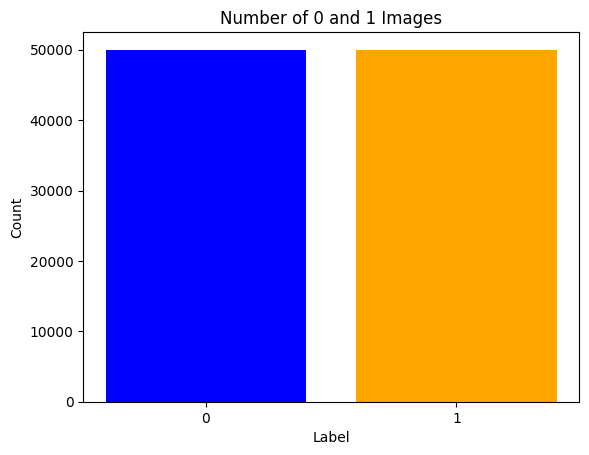

In [ ]:
# Count the occurrences of each label
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))

# Plot the bar graph
plt.bar(label_counts.keys(), label_counts.values(), color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of 0 and 1 Images')
plt.xticks(unique, ['0', '1'])
plt.show()

In [ ]:
# Check for NaN values in the labels array
nan_indices = np.argwhere(np.isnan(labels))

if len(nan_indices) > 0:
    print("There are NaN values in the labels section.")
    print("Indices of NaN values:", nan_indices)
else:
    print("There are no NaN values in the labels section.")

There are no NaN values in the labels section.


In [ ]:
# Get the shape of the first image
first_image_shape = images[0].shape

# Check if all images have the same shape
same_size = all(image.shape == first_image_shape for image in images)

if same_size:
    print("All images have the same size:", first_image_shape)
else:
    print("Not all images have the same size.")

All images have the same size: (32, 32, 3)


In [ ]:
import numpy as np
import pandas as pd

# Load the combined dataset
dataset = np.load('/content/original_train_dataset.npz')

# Extract images and labels from the dataset
images = dataset['images']
labels = dataset['labels']

# Create a DataFrame
df_train= pd.DataFrame({'Image_Path': ['image_{}.jpg'.format(i) for i in range(len(images))], 'Label': labels})

# Display the DataFrame
df_train.head()

,Image_Path,Label
0,image_0.jpg,1
1,image_1.jpg,1
2,image_2.jpg,0
3,image_3.jpg,0
4,image_4.jpg,0


In [ ]:
df_train


,Image_Path,Label
0,image_0.jpg,1
1,image_1.jpg,1
2,image_2.jpg,0
3,image_3.jpg,0
4,image_4.jpg,0
...,...,...
99995,image_99995.jpg,0
99996,image_99996.jpg,1
99997,image_99997.jpg,0
99998,image_99998.jpg,1


# Model Building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

img_height = 32
img_width = 32
batch_size = 500

dataset_dir = "/content/CIFAKE/CIFAKE"
print("Loading dataset from: " + dataset_dir)

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = val_ds.class_names
print(class_names)

Loading dataset from: /content/CIFAKE/CIFAKE
Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


In [ ]:
# Function for plotting the error rate and metrics rate
def plot_metrics(history, metric):
    plt.plot(history.history[metric], label = metric)
    plt.plot(history.history['val_' + metric], label='val_' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

# Constant values that will be shared by all the models
val_true_classes = np.concatenate([y for x, y in val_ds], axis = 0)  # Get true labels
class_names = ['FAKE', 'REAL']
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)


# RESNET

In [ ]:
#Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448  

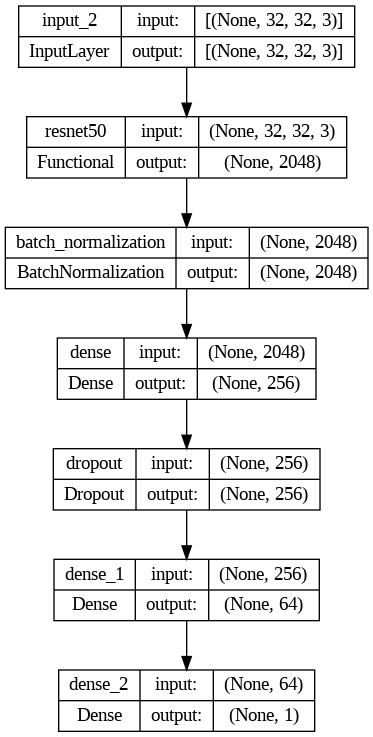

In [ ]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [ ]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/100


I0000 00:00:1708622949.334992      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 [==============================] - 221s 873ms/step - loss: 1.7356 - accuracy: 0.9024 - precision: 0.8993 - recall: 0.9064 - val_loss: 3.4438 - val_accuracy: 0.5215 - val_precision: 0.5110 - val_recall: 0.9999
Epoch 2/100
200/200 [==============================] - 30s 144ms/step - loss: 0.3978 - accuracy: 0.9453 - precision: 0.9449 - recall: 0.9458 - val_loss: 0.3044 - val_accuracy: 0.9339 - val_precision: 0.9709 - val_recall: 0.8946
Epoch 3/100
200/200 [==============================] - 31s 150ms/step - loss: 0.2100 - accuracy: 0.9555 - precision: 0.9550 - recall: 0.9560 - val_loss: 0.2059 - val_accuracy: 0.9380 - val_precision: 0.9845 - val_recall: 0.8899
Epoch 4/100
200/200 [==============================] - 30s 144ms/step - loss: 0.1556 - accuracy: 0.9619 - precision: 0.9619 - recall: 0.9619 - val_loss: 0.1945 - val_accuracy: 0.9482 - val_precision: 0.9731 - val_recall: 0.9220
Epoch 5/100
200/200 [==============================] - 30s 148ms/step - loss: 0.1327 - accuracy: 0.

In [ ]:
# Evaluate the model on the test dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

40/40 [==============================] - 7s 139ms/step - loss: 0.1429 - accuracy: 0.9590 - precision: 0.9626 - recall: 0.9551
Val Loss: 0.1429
Val Accuracy: 0.9590
Val Precision: 0.9626
Val Recall: 0.9551


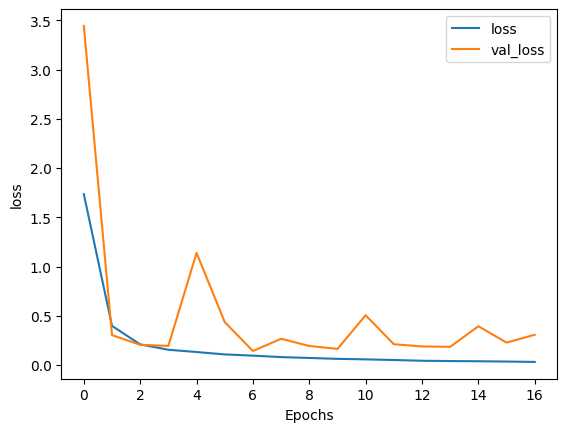

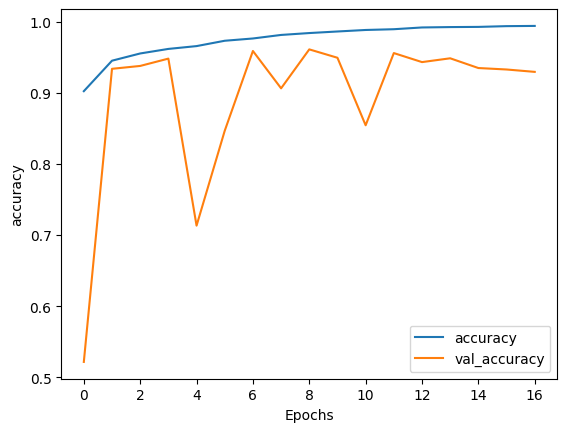

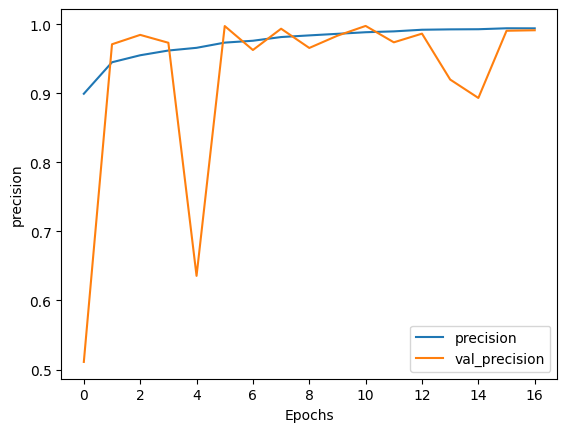

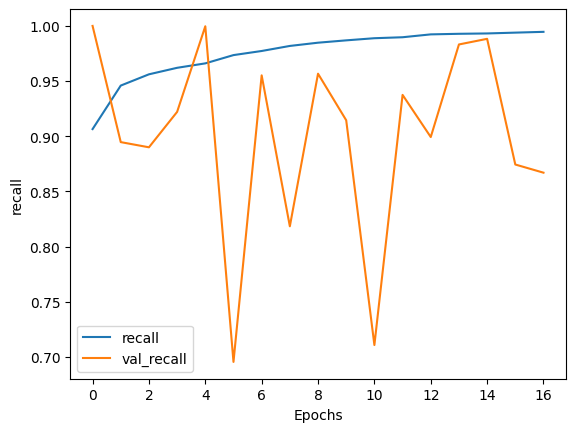

In [ ]:
# Plot error rates and metric rates
plot_metrics(ResNet_model_history, 'loss')
plot_metrics(ResNet_model_history, 'accuracy')
plot_metrics(ResNet_model_history, 'precision')
plot_metrics(ResNet_model_history, 'recall')

# VGG

In [ ]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True

# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448

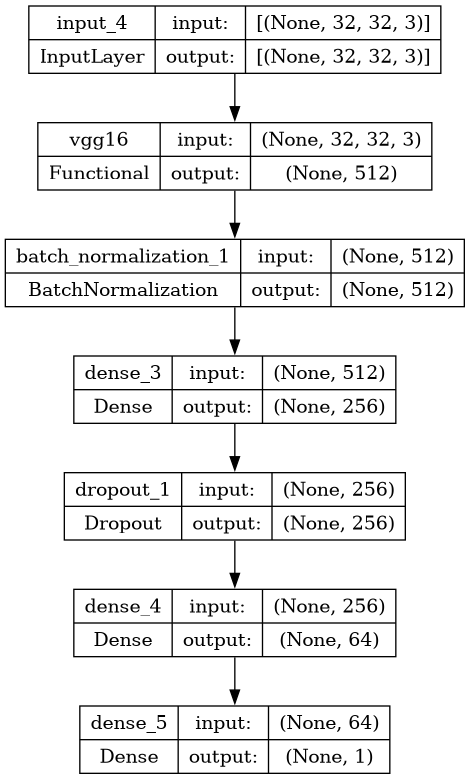

In [ ]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [ ]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/100
200/200 [==============================] - 50s 188ms/step - loss: 1.3875 - accuracy: 0.8403 - precision_1: 0.8191 - recall_1: 0.8734 - val_loss: 0.6160 - val_accuracy: 0.8482 - val_precision_1: 0.7736 - val_recall_1: 0.9844
Epoch 2/100
200/200 [==============================] - 39s 189ms/step - loss: 0.3537 - accuracy: 0.9274 - precision_1: 0.9254 - recall_1: 0.9299 - val_loss: 0.3700 - val_accuracy: 0.8755 - val_precision_1: 0.8062 - val_recall_1: 0.9885
Epoch 3/100
200/200 [==============================] - 30s 145ms/step - loss: 0.2245 - accuracy: 0.9417 - precision_1: 0.9433 - recall_1: 0.9399 - val_loss: 0.2839 - val_accuracy: 0.9083 - val_precision_1: 0.8523 - val_recall_1: 0.9879
Epoch 4/100
200/200 [==============================] - 26s 128ms/step - loss: 0.1780 - accuracy: 0.9515 - precision_1: 0.9520 - recall_1: 0.9509 - val_loss: 0.2001 - val_accuracy: 0.9341 - val_precision_1: 0.9787 - val_recall_1: 0.8876


In [ ]:
# Evaluate the model on the test dataset
val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

40/40 [==============================] - 5s 93ms/step - loss: 0.1407 - accuracy: 0.9590 - precision_1: 0.9698 - recall_1: 0.9476
Val Loss: 0.1407
Val Accuracy: 0.9590
Val Precision: 0.9698
Val Recall: 0.9476


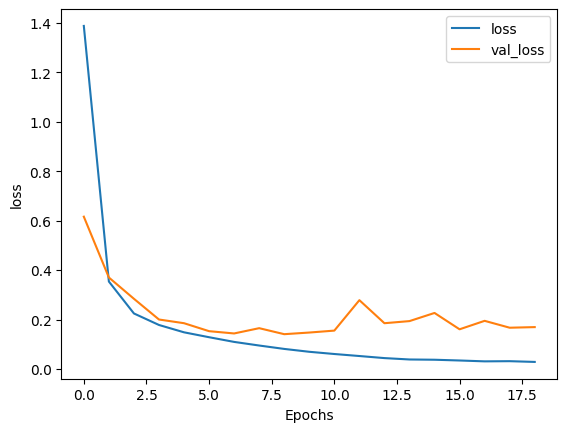

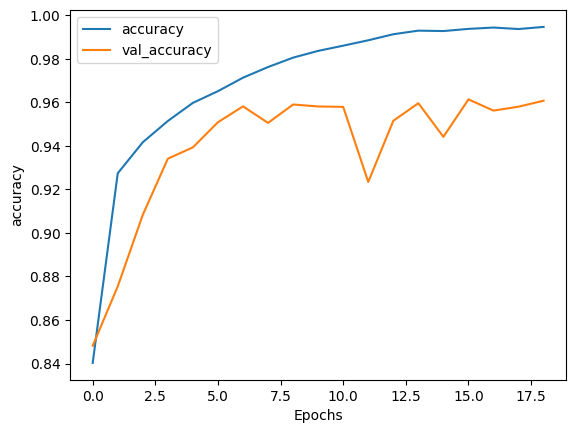

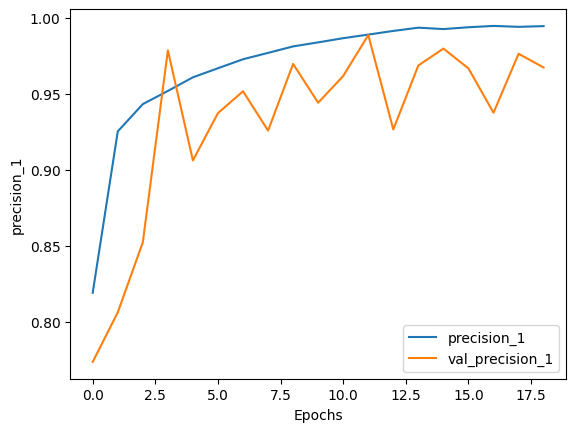

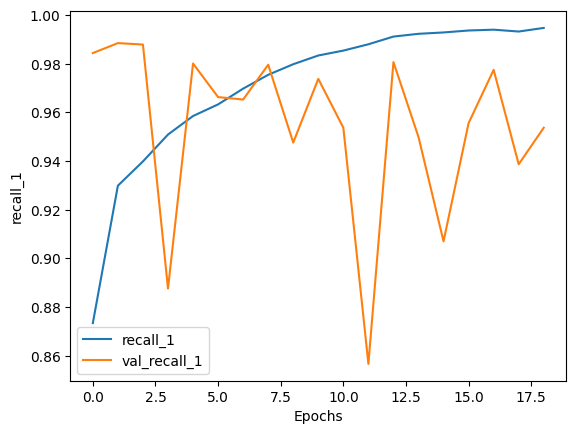

In [ ]:
# Plot error rates and metric rates
plot_metrics(VGG_model_history, 'loss')
plot_metrics(VGG_model_history, 'accuracy')
plot_metrics(VGG_model_history, 'precision_1')
plot_metrics(VGG_model_history, 'recall_1')

# Efficient Net

In [ ]:
# Building the Transfer Learning model using EfficientNetV2B0
EfficientNet_base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
EfficientNet_base_model.trainable = True

# Create a new model on top of the EfficientNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = EfficientNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
EfficientNet_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
EfficientNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
EfficientNet_model.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                            

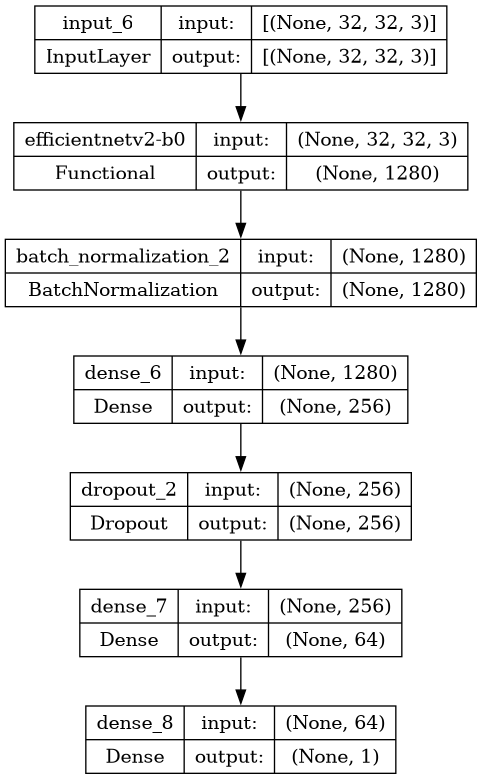

In [ ]:
# Visualize the EfficientNet model architecture
tf.keras.utils.plot_model(EfficientNet_model, show_shapes = True, to_file = 'EfficientNet_model.png')
Image('EfficientNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using EfficientNet...")
EfficientNet_model_history = EfficientNet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using EfficientNet...
Epoch 1/100
200/200 [==============================] - 93s 262ms/step - loss: 1.6680 - accuracy: 0.9350 - precision_2: 0.9342 - recall_2: 0.9359 - val_loss: 0.5195 - val_accuracy: 0.9590 - val_precision_2: 0.9495 - val_recall_2: 0.9697
Epoch 2/100
200/200 [==============================] - 52s 254ms/step - loss: 0.2824 - accuracy: 0.9656 - precision_2: 0.9670 - recall_2: 0.9642 - val_loss: 0.2120 - val_accuracy: 0.9534 - val_precision_2: 0.9245 - val_recall_2: 0.9874
Epoch 3/100
200/200 [==============================] - 51s 250ms/step - loss: 0.1436 - accuracy: 0.9746 - precision_2: 0.9755 - recall_2: 0.9735 - val_loss: 0.1376 - val_accuracy: 0.9690 - val_precision_2: 0.9764 - val_recall_2: 0.9613
Epoch 4/100
200/200 [==============================] - 50s 246ms/step - loss: 0.1063 - accuracy: 0.9805 - precision_2: 0.9811 - recall_2: 0.9799 - val_loss: 0.1253 - val_accuracy: 0.9675 - val_precision_2: 0.9573 - val_recall_2: 

In [ ]:
# Evaluate the model on the test dataset
val_loss, val_accuracy, val_precision, val_recall = EfficientNet_model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

40/40 [==============================] - 5s 100ms/step - loss: 0.0877 - accuracy: 0.9708 - precision_2: 0.9831 - recall_2: 0.9581
Val Loss: 0.0877
Val Accuracy: 0.9708
Val Precision: 0.9831
Val Recall: 0.9581


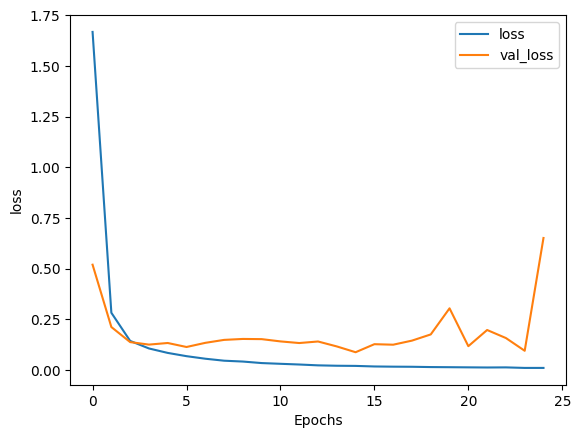

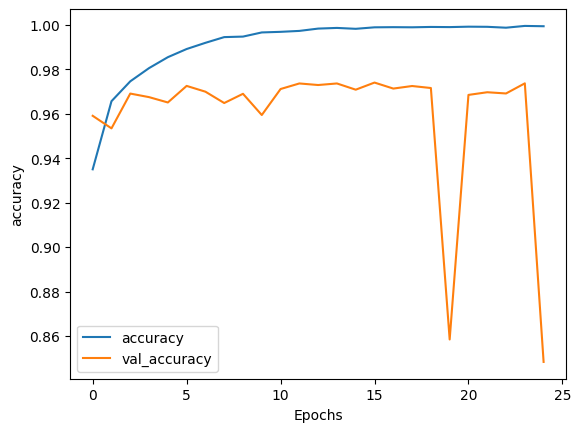

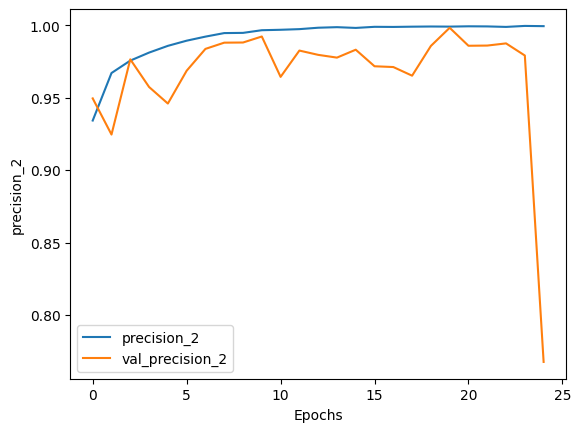

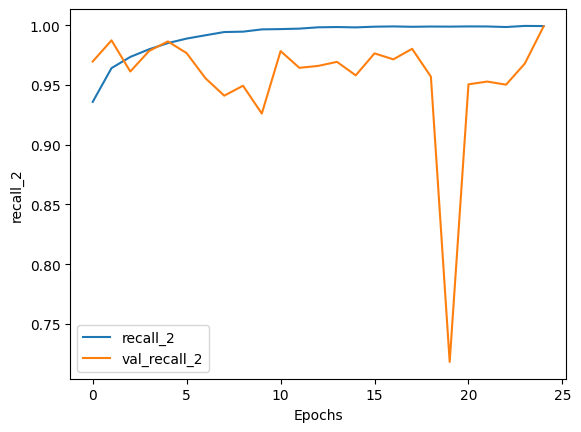

In [ ]:
# Plot error rates and metric rates
plot_metrics(EfficientNet_model_history, 'loss')
plot_metrics(EfficientNet_model_history, 'accuracy')
plot_metrics(EfficientNet_model_history, 'precision_2')
plot_metrics(EfficientNet_model_history, 'recall_2')

# MobileNet


In [ ]:
# Building the Transfer Learning model using MobileNetV3
MobileNet_base_model = tf.keras.applications.MobileNetV3Small(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
MobileNet_base_model.trainable = True

# Create a new model on top of the MobileNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = MobileNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
MobileNet_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
MobileNet_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
MobileNet_model.summary()

4334752/4334752 [==============================] - 0s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 MobilenetV3small (Function  (None, 576)               939120    
 al)                                                             
                                                                 
 batch_normalization_3 (Bat  (None, 576)               2304      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               147712    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                              

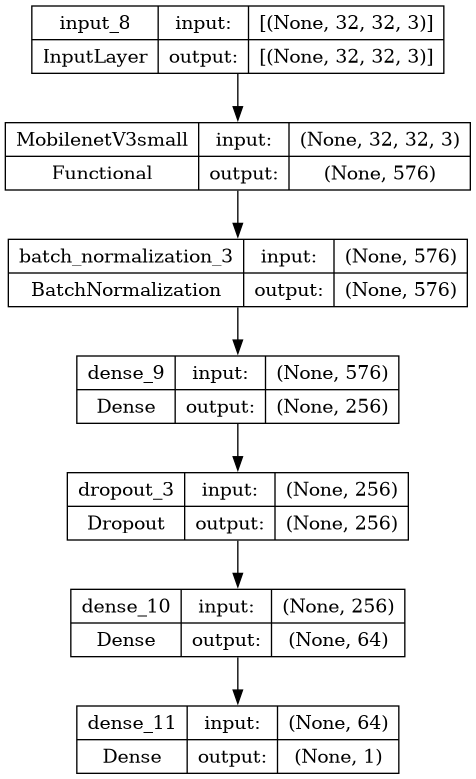

In [ ]:
# Visualize the MobileNet model architecture
tf.keras.utils.plot_model(MobileNet_model, show_shapes = True, to_file = 'MobileNet_model.png')
Image('MobileNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using MobileNet...")
MobileNet_model_history = MobileNet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using MobileNet...
Epoch 1/100
200/200 [==============================] - 54s 134ms/step - loss: 0.9589 - accuracy: 0.8435 - precision_3: 0.8305 - recall_3: 0.8632 - val_loss: 0.2743 - val_accuracy: 0.9099 - val_precision_3: 0.9638 - val_recall_3: 0.8518
Epoch 2/100
200/200 [==============================] - 28s 137ms/step - loss: 0.2060 - accuracy: 0.9332 - precision_3: 0.9339 - recall_3: 0.9324 - val_loss: 0.5098 - val_accuracy: 0.8163 - val_precision_3: 0.9955 - val_recall_3: 0.6355
Epoch 3/100
200/200 [==============================] - 27s 133ms/step - loss: 0.1668 - accuracy: 0.9445 - precision_3: 0.9460 - recall_3: 0.9428 - val_loss: 0.1599 - val_accuracy: 0.9453 - val_precision_3: 0.9412 - val_recall_3: 0.9501
Epoch 4/100
200/200 [==============================] - 29s 141ms/step - loss: 0.1491 - accuracy: 0.9506 - precision_3: 0.9511 - recall_3: 0.9501 - val_loss: 0.3109 - val_accuracy: 0.9010 - val_precision_3: 0.9900 - val_recall_3: 0.8

In [ ]:
# Evaluate the model on the test dataset
val_loss, val_accuracy, val_precision, val_recall = MobileNet_model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

40/40 [==============================] - 4s 74ms/step - loss: 0.1394 - accuracy: 0.9528 - precision_3: 0.9399 - recall_3: 0.9676
Val Loss: 0.1394
Val Accuracy: 0.9528
Val Precision: 0.9399
Val Recall: 0.9676


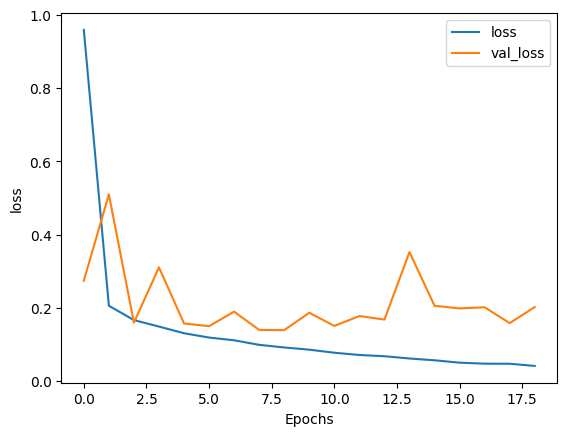

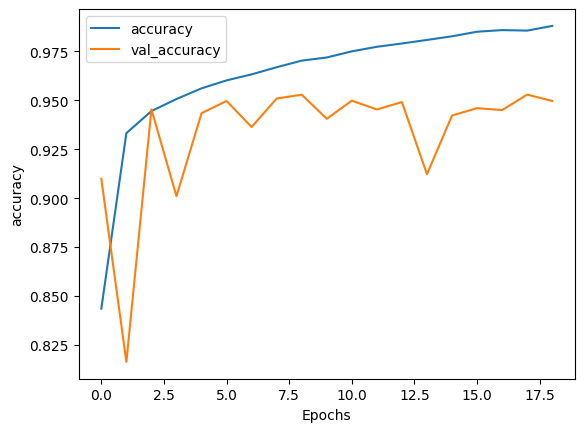

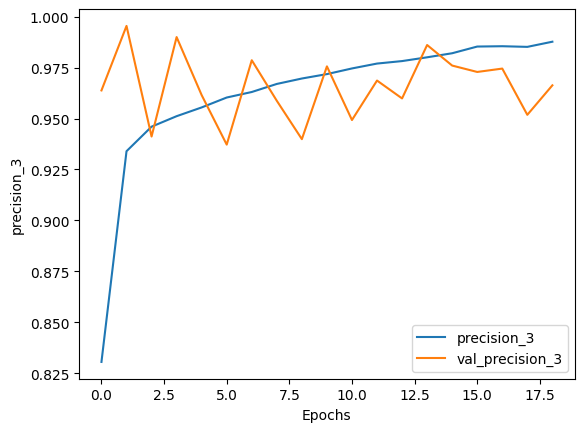

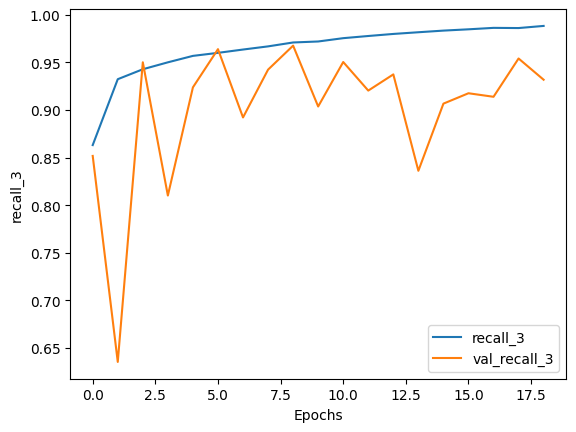

In [ ]:
# Plot error rates and metric rates
plot_metrics(MobileNet_model_history, 'loss')
plot_metrics(MobileNet_model_history, 'accuracy')
plot_metrics(MobileNet_model_history, 'precision_3')
plot_metrics(MobileNet_model_history, 'recall_3')